Pre-requirements! Select some users and put
them into a CSV in `./demo/users.csv`. Include column names!

```sql
select id, name, surname, signupDate
from User
limit 1000000;
```

Effortless shell integration:

In [4]:
!head -n 5 ../data/users.csv

id,name,surname,signupDate
0000019ef95d4b2799cb23453a0b552e,cleopatraslots,"",2011-12-11 07:50:23
0000027a49ed41fdafbd66da296b72de,mero,"",2013-06-23 22:28:43
000002a65d31401288bcf5e79f0cee20,Bernard,Bray,2015-02-16 11:53:54
000002c7103c4936b588a120ae7e1d4d,totobooksite,"",2020-09-06 13:49:18
00000388b2de45cca313f4ec6e271d8b,پیماناشرفی,"",2017-04-13 12:14:13
0000043a9c9947a997c01664fb5d2afc,tertoleftdisp,"",2011-09-25 15:35:44
000004e98d284145a67f920f9a4eda37,akash,chhatui,2011-01-31 16:13:19
000004f5ae3f433cbf8121f12d04252e,fireplace2,fireplace2,2012-12-07 07:14:00
00000509d32c49e4b99ca7d6e86ffa2a,andrew,kawalek,2010-11-20 01:37:34


We can read from CSV in one line:

In [44]:
import pandas as pd
df = pd.read_csv('../data/users.csv',
				 parse_dates=['signupDate'])

Many ways to look inside:

In [11]:
df.sample(5)

,id,name,surname,signupDate
114817,02a9517f568c45e2b4138954316521ed,Ian,NaN,2011-02-09 21:39:15
387422,08fbb33f57d446a8b140c43a68aeed02,Fabio,NaN,2017-05-01 21:27:51
753894,1178d3676f6440d2a4b68351d845e0a0,Batang,Caloocan,2010-08-13 02:11:20
569672,0d37b66cfc88428cb6c8bdc1ddee002e,Irina,NaN,2015-11-25 14:07:39
555000,0ce1204628084cf8b48d392392663213,Adittia,Powar,2012-04-12 15:27:30


In [12]:
df.head(2)

,id,name,surname,signupDate
0,0000019ef95d4b2799cb23453a0b552e,cleopatraslots,NaN,2011-12-11 07:50:23
1,0000027a49ed41fdafbd66da296b72de,mero,NaN,2013-06-23 22:28:43


In [13]:
df.tail(3)

,id,name,surname,signupDate
999997,172cd3141e824aad8b2defbf68760970,kristian,king,2014-12-07 03:42:54
999998,172cd4692f8e4bedb7627e44ec1f9f66,keyara,otero,2014-11-04 17:40:07
999999,172cd603314f4a08a856ef7eecca05fe,SRIJAN,NaN,2017-10-19 10:31:37


How many people have both names set?

In [17]:
df.dropna().count()


id            1000000
name           999400
surname        637374
signupDate    1000000
dtype: int64

How many full namesakes live in Yola?

In [28]:
namesakes = df.value_counts(['name', 'surname'])
namesakes.head(10)

name            surname   
First           Last          22014
Demo            Demo           2925
Kunde           Kunde          1120
WebsiteBuilder  Activeuser      828
Marvin          Mikkelson       165
Sibername       Customer        164
John            Smith           130
kunde           kunde           119
john            Francis         106
1               1                68
dtype: int64

In [29]:
namesakes.iloc[10:20]

name      surname 
john      john        64
          smith       59
David     David       58
James     James       57
Daniel    Daniel      54
alex      alex        53
John      John        53
Jhon      Smith       52
Billups,  Chauncey    51
Chris     Chris       50
dtype: int64

Are there any Anton's? Please export them as Python dictionaries.

In [40]:
df[df['name'] == 'Anton'].sample(3).to_dict(orient='records')

[{'id': '07c6620877744f90b6a029c094a2ecd8',
  'name': 'Anton',
  'surname': 'Gayness',
  'signupDate': '2011-09-01 08:19:56'},
 {'id': '0b99a0e4d3ee464ab867b964fd306652',
  'name': 'Anton',
  'surname': nan,
  'signupDate': '2013-09-26 13:35:12'},
 {'id': '00ad1b31d86f49f7b1f229b67b284061',
  'name': 'Anton',
  'surname': 'Petek',
  'signupDate': '2014-09-18 14:55:51'}]

When were the happiest days in Yola?

In [46]:
import swifter  # noqa
signup_by_day = df.swifter.apply(
	lambda row: row.signupDate.date(),
	axis='columns').value_counts()

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Day', ylabel='User Signup Count'>

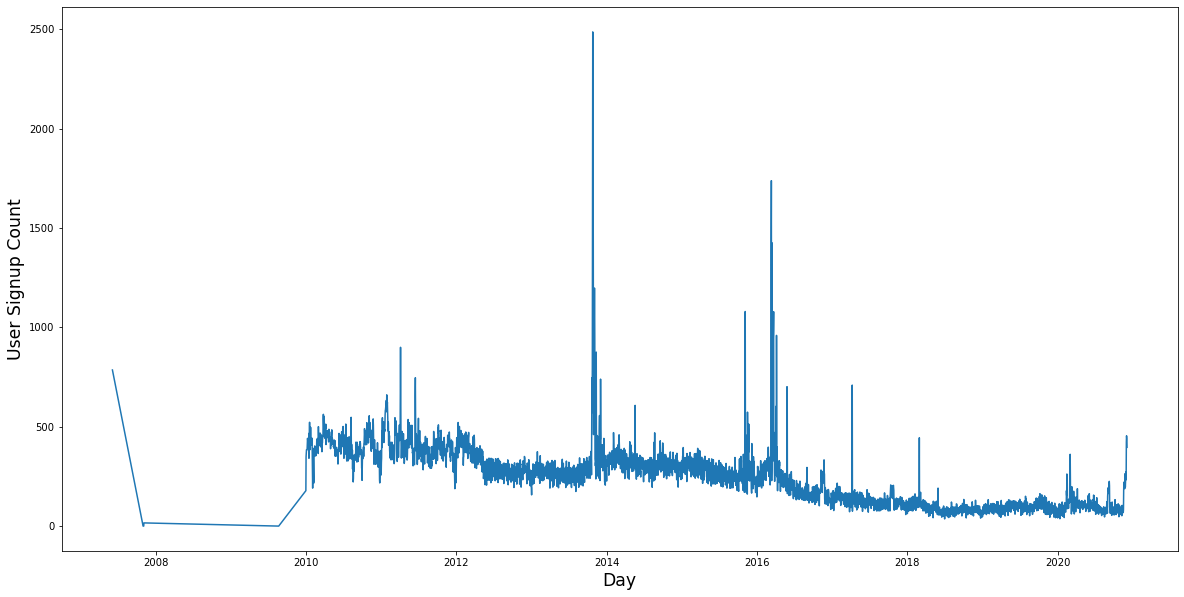

In [50]:
plt.figure(figsize=(20, 10))
plt.xlabel('Day', **dict(fontsize='xx-large'))
plt.ylabel('User Signup Count', **dict(fontsize='xx-large'))
signup_by_day.plot()

In [58]:
signup_by_day.sort_values(ascending=False).head(10)

2013-10-25    2486
2013-10-26    2463
2013-10-24    1783
2013-10-27    1779
2016-03-11    1738
2016-03-15    1425
2016-03-10    1378
2013-11-02    1198
2013-11-03    1196
2015-11-05    1080
dtype: int64